# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2019

Мягкий дедлайн: 07:59MSK 14.10.2019 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 16.10.2019

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

## Реализация градиентного спуска

Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью:

** Задание 1 (1 балл)** Градиентного спуска;

** Задание 2 (1.5 балла)** Стохастического градиентного спуска;

** Задание 3 (2.5 балла)** Метода Momentum.


Во всех пунктах необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускается использовать только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):

    * проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
    * достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).
* Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);
* Инициализировать веса можно случайным образом или нулевым вектором. 


Ниже приведён шаблон класса, который должен содержать код реализации каждого из методов.

In [43]:
import numpy as np
from sklearn.base import BaseEstimator
import scipy

x_full = []
y_full = []
x_stochastic = []
y_stochastic = []
x_momentum = []
y_momentum = []
x_Adam = []
y_Adam = []

class LinearReg(BaseEstimator):
    def __init__(self, gd_type='stochastic', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2, beta1 = 0.9, beta2 = 0.999, m = None, v = None, a = 0.001, e = 1e-8):
        """
        gd_type: 'full' or 'stochastic' or 'momentum'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.beta1 = beta1
        self.beta2 = beta2
        self.a = a
        self.m = None
        self.v = None
        self.e = e

    
    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        
        X=np.array(X.toarray())
        y=np.array(y)
        
        self.loss_history = []
        
        self.w = np.zeros(X.shape[1])
        self.m = np.zeros(X.shape[1])
        self.v = np.zeros(X.shape[1])
        
#         self.w=self.w0
        
        self.loss_history = []
        
        prev = self.w.copy()
        prev_m = self.m.copy()
        prev_v = self.v.copy()
        
        h = 0
        for i in range(self.max_iter):
            if (self.gd_type == 'full'):      
                self.w = self.w - self.eta * self.calc_gradient(X, y)
                self.loss_history.append(self.calc_loss(X, y))
                
                x_full.append(i)
                y_full.append(self.calc_loss(X, y))
            if (self.gd_type == 'stochastic' ):
                sample = np.random.randint(X.shape[0], size=1)
                self.w -= self.eta * self.calc_gradient(X[sample], y[sample])
                
                #self.w = self.w - self.eta * self.calc_gradient(X[np.random.randint()], y)
                self.loss_history.append(self.calc_loss(X, y))
                
                x_stochastic.append(i)
                y_stochastic.append(self.calc_loss(X, y))
            if (self.gd_type == 'momentum'):
                h = self.alpha * h + self.eta * self.calc_gradient(X, y)
                self.w = self.w - h
                self.loss_history.append(self.calc_loss(X, y))
                
                x_momentum.append(i)
                y_momentum.append(self.calc_loss(X, y))
            if (self.gd_type == 'Adam'):
                sample = np.random.randint(X.shape[0], size=1)
                self.m = self.beta1 * prev_m + (1 - self.beta1) * self.calc_gradient(X[sample], y[sample])
                self.v = self.beta2 * prev_v + (1 - self.beta2) * self.calc_gradient(X[sample], y[sample]) * self.calc_gradient(X[sample], y[sample])
                m_new = self.m / (1 - (self.beta1 ** i))
                v_new = self.v / (1 - (self.beta2 ** i))
                print(self.w, self.a, m_new, v_new, self.e)
                self.w = self.w - self.a * m_new / (np.sqrt(v_new) + self.e)
                self.loss_history.append(self.calc_loss(X, y))
                
                x_Adam.append(i)
                y_Adam.append(self.calc_loss(X, y))
            if (np.sqrt(np.sum(np.square(prev - self.w)))  < self.tolerance):
                break
            #print(i, self.max_iter, np.sqrt(np.sum(np.square(prev - self.w))), self.tolerance)
            prev = self.w.copy()
            
        
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return X.dot(self.w)
       # return np.dot(X, self.w)
            
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        #return 2 * np.dot(X.T, np.dot(X, self.w) - y)
        return (X.T.dot(X.dot(self.w)-y).dot(2))/(y.shape[0])
        
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float 
        """ 
    
        return mean_squared_error(self.predict(X), y)
        pass

In [2]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

** Задание 4 (0 баллов)**. 
* Загрузите данные из домашнего задания 2 ([train.csv](https://www.kaggle.com/c/nyc-taxi-trip-duration/data));
* Разбейте выборку на обучающую и тестовую в отношении 7:3 с random_seed=0;
* Преобразуйте целевую переменную `trip_duration` как $\hat{y} = \log{(y + 1)}$.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

sns.set(style="darkgrid")

train = pd.read_csv("train.csv")

Тут я делаю небольшую предобработку, добавляя признаки из дз 2:

In [5]:
from sklearn.model_selection import train_test_split

train['trip_duration'] = np.log1p(train['trip_duration'])
del train ['dropoff_datetime']
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
train['weekday'] = train.apply(lambda x: x['pickup_datetime'].dayofweek, axis=1)
train['month'] = train.apply(lambda x: x['pickup_datetime'].month, axis=1)
train['hour'] = train.apply(lambda x: x['pickup_datetime'].hour, axis=1)
train['day'] = train.apply(lambda x: x['pickup_datetime'].dayofyear, axis=1)
train['anomaly_january'] = train.apply(lambda x: (x['pickup_datetime'].dayofyear == 22 or x['pickup_datetime'].dayofyear == 23), axis=1)
train['anomaly_may'] = train.apply(lambda x: x['pickup_datetime'].dayofyear == 150 or x['pickup_datetime'].dayofyear == 151, axis=1)
from haversine import haversine, Unit
train['haversine'] = train.apply(lambda x: haversine((x['pickup_longitude'], x['pickup_latitude']), (x['dropoff_longitude'], x['dropoff_latitude'])) , axis=1)
train['log_haversine'] = np.log1p(train['haversine'])

train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,hour,day,anomaly_january,anomaly_may,haversine,log_haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,0,3,17,74,False,False,1.949980,1.081798
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,6,0,164,False,False,2.132181,1.141730
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,1,11,19,False,False,3.359043,1.472253
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2,4,19,97,False,False,0.475520,0.389010
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,5,3,13,86,False,False,0.328461,0.284021
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,6.095825,5,1,22,30,False,False,1.047817,0.716774
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,5.834811,4,6,22,169,False,False,1.314694,0.839278
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,7.347300,5,5,7,142,False,False,5.328993,1.845141
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,5.545177,4,5,23,148,False,False,1.532389,0.929163
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,7.111512,3,3,21,70,False,False,1.662584,0.979297


In [6]:

data_train, data_test = train_test_split(train, test_size=0.3, random_state=0)

** Задание 5 (3 балла)**. Обучите и провалидируйте модели на данных из предыдущего пункта, сравните качество между методами по метрикам MSE и $R^2$. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [10]:
y_test = data_test['trip_duration']
y_train = data_train['trip_duration']
X_test = data_test[['weekday', 'month', 'hour', 'day', 'anomaly_january', 'anomaly_may', 'log_haversine']]
X_train = data_train[['weekday', 'month', 'hour', 'day', 'anomaly_january', 'anomaly_may', 'log_haversine']]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

categorical = ['weekday', 'month', 'hour', 'day']
#categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearReg(gd_type='full'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE for full = %.6f" % mean_squared_error(y_test, y_pred))
print("R^2 for full = %.6f" % r2_score(y_test, y_pred))

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearReg(gd_type='stochastic'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE for stochastic = %.6f" % mean_squared_error(y_test, y_pred))
print("R^2 for stochastic = %.6f" % r2_score(y_test, y_pred))

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearReg(gd_type='momentum'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE for momentum = %.6f" % mean_squared_error(y_test, y_pred))
print("R^2 for momentum = %.6f" % r2_score(y_test, y_pred))

#from sklearn.linear_model import Ridge
#from sklearn.metrics import mean_squared_error


#y_pred = model.predict(X_test[numeric_features])
#y_train_pred = model.predict(X_train[numeric_features])

#print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
#rint("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

MSE for full = 0.629428
R^2 for full = 0.000350
MSE for stochastic = 0.676447
R^2 for stochastic = -0.074325
MSE for momentum = 0.629415
R^2 for momentum = 0.000371


Теперь посмотрим влияние max_iter на процесс оптимизации. Возьмем 4 значения: 100, 250, 500 и 1000.

In [11]:
my_list = [100, 250, 500, 1000]
for i in my_list:
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearReg(gd_type='full', max_iter = i))
    ])

    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MSE for full for", i, "iterations = %.6f" % mean_squared_error(y_test, y_pred))
    print("R^2 for full for", i, "iterations = %.6f" % r2_score(y_test, y_pred))

    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearReg(gd_type='stochastic', max_iter = i))
    ])

    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MSE for stochastic for", i, "iterations = %.6f" % mean_squared_error(y_test, y_pred))
    print("R^2 for stochastic for", i, "iterations = %.6f" % r2_score(y_test, y_pred))

    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearReg(gd_type='momentum', max_iter = i))
    ])

    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MSE for momentum for", i, "iterations = %.6f" % mean_squared_error(y_test, y_pred))
    print("R^2 for momentum for", i, "iterations = %.6f" % r2_score(y_test, y_pred))

MSE for full for 100 iterations = 10.364260
R^2 for full for 100 iterations = -15.460397
MSE for stochastic for 100 iterations = 10.215454
R^2 for stochastic for 100 iterations = -15.224066
MSE for momentum for 100 iterations = 10.350080
R^2 for momentum for 100 iterations = -15.437877
MSE for full for 250 iterations = 1.744452
R^2 for full for 250 iterations = -1.770519
MSE for stochastic for 250 iterations = 1.931374
R^2 for stochastic for 250 iterations = -2.067386
MSE for momentum for 250 iterations = 1.740448
R^2 for momentum for 250 iterations = -1.764159
MSE for full for 500 iterations = 0.670376
R^2 for full for 500 iterations = -0.064683
MSE for stochastic for 500 iterations = 0.759796
R^2 for stochastic for 500 iterations = -0.206698
MSE for momentum for 500 iterations = 0.670144
R^2 for momentum for 500 iterations = -0.064315
MSE for full for 1000 iterations = 0.629428
R^2 for full for 1000 iterations = 0.000350
MSE for stochastic for 1000 iterations = 0.659241
R^2 for stoch

И аналогично для альфы - используем значения 0.1, 0.01, 0.001 для анализа:

In [25]:
my_list = [0.1, 0.01, 0.001]
for i in my_list:
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearReg(gd_type='full', alpha = i))
    ])

    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MSE for full for alpha =", i, "= %.6f" % mean_squared_error(y_test, y_pred))
    print("R^2 for full for alpha =", i, "= %.6f" % r2_score(y_test, y_pred))

    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearReg(gd_type='stochastic', alpha = i))
    ])

    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MSE for stochastic for alpha =", i, "= %.6f" % mean_squared_error(y_test, y_pred))
    print("R^2 for stochastic for alpha =", i, "= %.6f" % r2_score(y_test, y_pred))

    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearReg(gd_type='momentum', alpha = i))
    ])

    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MSE for momentum for alpha =", i, "= %.6f" % mean_squared_error(y_test, y_pred))
    print("R^2 for momentum for alpha =", i, "= %.6f" % r2_score(y_test, y_pred))

MSE for full for alpha = 0.1 = 0.629428
R^2 for full for alpha = 0.1 = 0.000350
MSE for stochastic for alpha = 0.1 = 0.653876
R^2 for stochastic for alpha = 0.1 = -0.038478
MSE for momentum for alpha = 0.1 = 0.628126
R^2 for momentum for alpha = 0.1 = 0.002418
MSE for full for alpha = 0.01 = 0.629428
R^2 for full for alpha = 0.01 = 0.000350
MSE for stochastic for alpha = 0.01 = 0.678631
R^2 for stochastic for alpha = 0.01 = -0.077794
MSE for momentum for alpha = 0.01 = 0.629297
R^2 for momentum for alpha = 0.01 = 0.000558
MSE for full for alpha = 0.001 = 0.629428
R^2 for full for alpha = 0.001 = 0.000350
MSE for stochastic for alpha = 0.001 = 0.649518
R^2 for stochastic for alpha = 0.001 = -0.031556
MSE for momentum for alpha = 0.001 = 0.629415
R^2 for momentum for alpha = 0.001 = 0.000371


Хорошо видно, что с увеличением числа иттераций увеличивается точность (что очень логично), а от изменения альфы практически ничего не меняется

** Задание 6 (2 балла)**. Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом Momentum. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны получиться *красивые* графики!

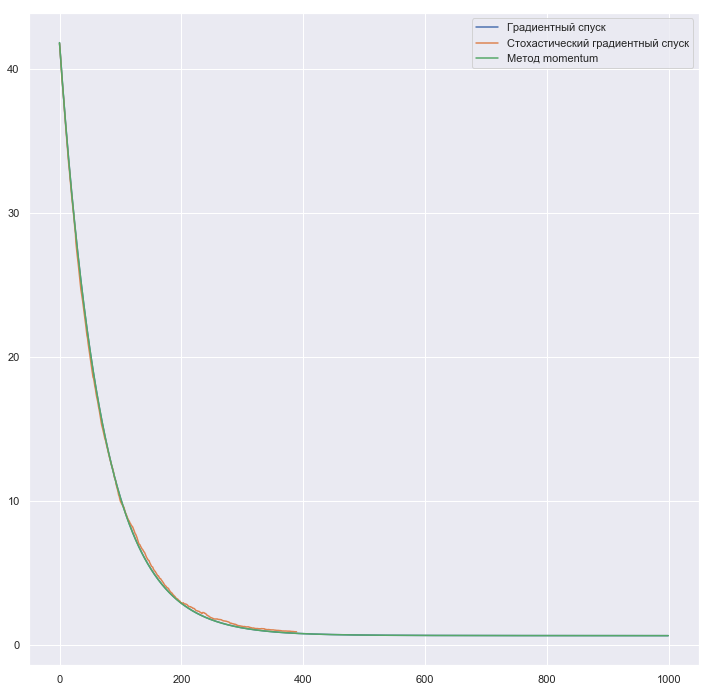

In [17]:
x_full = []
y_full = []
x_stochastic = []
y_stochastic = []
x_momentum = []
y_momentum = []

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearReg(gd_type='full'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearReg(gd_type='stochastic'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearReg(gd_type='momentum'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 12))
plt.plot(x_full, y_full, label='Градиентный спуск')
plt.plot(x_stochastic, y_stochastic, label='Стохастический градиентный спуск')
plt.plot(x_momentum, y_momentum, label='Метод momentum')
plt.legend()
plt.show()

Судя по графикам, скорости сходимости практически идентичны

### Бонус 

** Задание 7 (2 балла)**. Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью метода
[Adam](https://arxiv.org/pdf/1412.6980.pdf) - добавьте при необходимости параметры в класс модели, повторите пункты 5 и 6 и сравните результаты. 

In [52]:
x_Adam = []
y_Adam = []

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearReg(gd_type='Adam'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE for Adam = %.6f" % mean_squared_error(y_test, y_pred))
print("R^2 for Adam = %.6f" % r2_score(y_test, y_pred))
plt.figure(figsize=(12, 12))
plt.plot(x_Adam, y_Adam)
plt.show()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.] 0.001 [ nan  nan  nan  nan  nan  nan -inf  nan -inf  nan  nan  nan  nan  nan -inf
  nan  nan  nan  nan  nan  n

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

** Задание 8 (2 балла)**. Реализуйте линейную регрессию с функцией потерь
$$ L(\hat{y}, y) = log(cosh(\hat{y} - y)),$$

обучаемую с помощью градиентного спуска.

** Задание 9 (0.01 балла)**.  Вставьте картинку с вашим любимым мемом в этот Jupyter Notebook

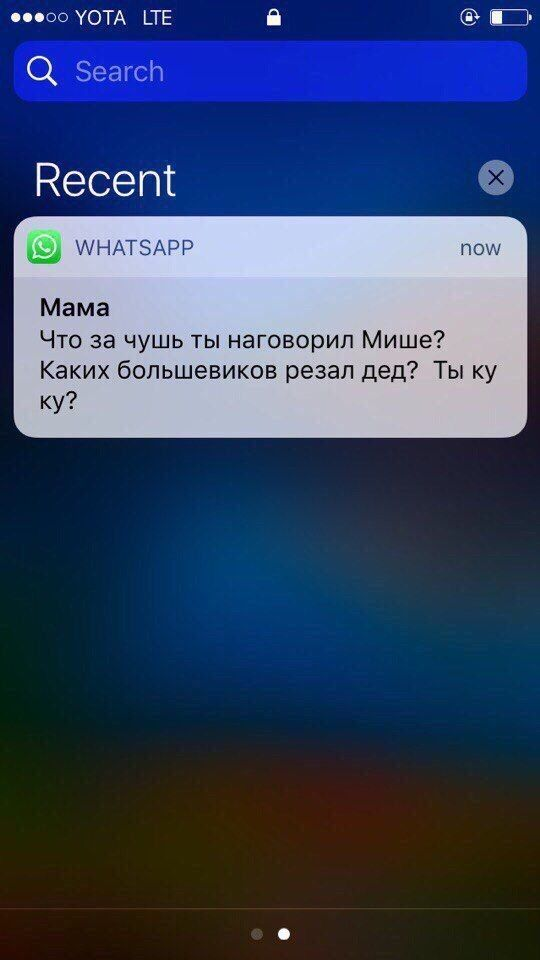

In [51]:
from IPython.display import Image
Image(filename='meme.png')